# ML Problem : Predicting whether an AirBnb is Instantly Bookable. 

In [ ]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this ML Problem, I will follow the machine learning life cycle and implement a model to predict whether an AirBnb is instantly bookable or not. I have selected the Airbnb NYC "listings" data set: `airbnbLisitngsData.csv`. I will then inspect the data with the problem in mind and begin to formulate a  project plan. I will then implement the machine learning project plan. 

I will complete the following tasks:

1. Build a DataFrame
2. Define my ML Problem
3. Perform exploratory data analysis to understand the data.
4. Define my Project Plan
5. Implement the Project Plan:
    * Prepare the data for my model.
    * Fit my model to the training data and evaluate the model.
    * Improve model's performance.

## Part 1: Build the DataFrame

Chossing the airbnb Lisings Dataset, I will build my DataFrame

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filename (path + filename) for the  data set.

In the code cell below, I loaded the data using `pd.read_csv()` and saved it to DataFrame `df`. 


In [ ]:
# File name of the  data set
airbnbDataSet_filename = os.path.join(os.getcwd(), "AirBnb-Instant_bookable", "airbnbListingsData.csv")

df = pd.read_csv(airbnbDataSet_filename)

## Part 2: Defining my ML Problem

I will be predicting whether an Airbnb is instantly bookable. In my dataset, the label will be the "instant_bookable" column and will either contain the value True or False.

This is a Supervised Learning model. Since the possible outcomes are either True or False, this is a Binary CLassification problem. 

The features include many columns like "reviews_per_month", "n_host_verifications", etc.

This is very useful to a company like AirBnb because it predicts the specific AirBnbs that produce quick return on investment. If the company knows the sites that are instantly bookable, it can focus on incentivising it or improving it's infrastructure even more to attract more and new customers. 

## Part 3: Understanding the Data

The next step is to perform exploratory data analysis. Inspecting and analyzing the data set with the machine learning problem in mind.

In [5]:
df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


In [6]:
df.shape

(28022, 50)

In [7]:
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',

In [8]:
# FINDING TEXT VALUES IN FEATURES

text_columns = df.select_dtypes(include=['object']).columns.tolist()
text_columns

['name',
 'description',
 'neighborhood_overview',
 'host_name',
 'host_location',
 'host_about',
 'neighbourhood_group_cleansed',
 'room_type',
 'amenities']

In [9]:
# Finding the number of values in each column containing 'object' datatype

for column in text_columns:
    unique_values = df[column].nunique()
    print(f'{column} : {unique_values}')

name : 27386
description : 25952
neighborhood_overview : 15800
host_name : 7566
host_location : 1364
host_about : 11962
neighbourhood_group_cleansed : 5
room_type : 4
amenities : 25020


In [10]:
# Dopping the Columns that cannot be One-Hot Encoded

df = df.drop(columns=['name'])
df = df.drop(columns=['description'])
df = df.drop(columns=['neighborhood_overview'])
df = df.drop(columns=['host_name'])
df = df.drop(columns=['host_location'])
df = df.drop(columns=['host_about'])
df = df.drop(columns=['amenities'])

In [11]:
# Applying One-Hot Encoding to the specified columns

columns_to_encode = ['neighbourhood_group_cleansed', 'room_type']
df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

In [12]:
# FINDING MISSING VALUES

missing_values = np.sum(df.isnull(), axis = 0)
print(missing_values)

host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                                             1354
price                                               0
minimum_nights                                      0
maximum_nights                                      0
minimum_minimum_nights                              0
maximum_minimum_nights                              0
minimum_maximum_nights                              0
maximum_maximum_nights                              0
minimum_nights_avg_ntm      

In [13]:
# Dropping the columns that have too many missing values

df = df.drop(columns=['host_response_rate'])
df = df.drop(columns=['host_acceptance_rate'])

In [14]:
# Replacing the missing values with medians 

input_median = ['bedrooms', 'beds']
for column in input_median:
    df[column].fillna(df[column].median(), inplace=True)

In [15]:
# Finding all the feature columns with Boolean values 

bool_columns = df.select_dtypes(include=['bool']).columns.tolist()
bool_columns

['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'has_availability',
 'instant_bookable']

In [16]:
# Making a list to change 

bool_columns_to_change = ['host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']
df[bool_columns_to_change] = df[bool_columns_to_change].astype(int)

In [17]:
df = df.drop(columns=['host_is_superhost'])

In [18]:
# Inspecting new shape
df.shape

(28022, 45)

In [19]:
# Inspecting the columns
df.columns

Index(['host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_

## Part 4: Defining the Project Plan

Now that we understand the data, in the cell below, I have defined my plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve the ML problem. Answering the following questions:

* Do I have a new feature list? If so, what are the features that I chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that I will use to prepare your data for modeling.
* What is the model?
* Describe the plan to train the model, analyze its performance and then improve the model. That is, describing the model building, validation and selection plan to produce a model that generalizes well to new data. 

Yes, I have a new feature list. I have removed some feature columns for example - "host_response_rate" and "host_acceptance rate" because they have a large number of missing values which is almost half the number of examples I have. For two of the other columns, I have averaged out the values. 

I have changed the columns that had Boolean text data into numeric one for True and zero for False. I have also removed columns that had a large number of text entries that could not be One-Hot Encoded. I have one hot encoded two feature columns that were feasible to be encoded.

I am creating a logistic regression model that will be used to predict whether an AirBnb is instantly bookable or not which is best accomplished by a binary classification model. 10% of data will be allocated for testing.

## Part 5: Implement the Project Plan

Importing additional packages that I will need to implement the project plan.

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [21]:
# Defining The features and the label

y = df['instant_bookable']
X = df.drop(columns="instant_bookable", axis=1)

#### I originally had "host_is_superhost" as our label but I realized that all datapoints in it were "True". So I deleted the column as it would not help the model to train as well. I changed the label to "instant_bookable"

#### Creating a test set that is 10 percent of the size of the data set.
Saving the results to variables X_train, X_test, y_train, y_test

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

#### Creating a logistic regression model object

In [23]:
model_default = LogisticRegression(max_iter=1000, C=1.0)
model_default.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
# Predicting probabilities and predicting class labels for the test set.

proba_predictions_default = model_default.predict_proba(X_test)[:, 1]
class_label_predictions_default = model_default.predict(X_test)

In [25]:
# Evaluating accuracy

acc_score = accuracy_score(y_test, class_label_predictions_default)
print('Confusion Matrix for the model: ')

c_n = confusion_matrix(y_test, class_label_predictions_default, labels=[True, False])
pd.DataFrame(
c_n,
columns=['Predicted: Is not Instantly Bookable', 'Predicted: Is Instantly Bookable'],
index=['Actual: Is not Instantly Bookable', 'Actual: Is Instantly Bookable']
)

Confusion Matrix for the model: 


,Predicted: Is not Instantly Bookable,Predicted: Is Instantly Bookable
Actual: Is not Instantly Bookable,21,780
Actual: Is Instantly Bookable,2,2000


### Perform Logistic Regression Model Selection Using GridSearchSV()

In [26]:
# Setting up a parameter grid

cs = [10**i for i in range(-5, 5)]
param_grid = {"C" : cs}
param_grid

{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

In [27]:
# Creating a LogisticRegression model object with the argument max_iter=1000. 
model = LogisticRegression(max_iter=1000)

# Running a grid search with 5-fold cross-validation and assigning the output to the object 'grid'.
grid = GridSearchCV(model, param_grid=param_grid, cv=5)

# Fiting the model on the training data and assigning the fitted model
grid_search = grid.fit(X_train, y_train)
print('Done')

/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

Done


In [28]:
# Getting the best hyperparameter

best_C = grid_search.best_params_['C']
best_C

1

In [29]:
# Initializing a Logistic Regression Model

model_best = LogisticRegression(max_iter=1000, C=best_C)
model_best.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=1000)

In [30]:
# 1. Making predictions on the test data using the predict_proba() method
proba_predictions_best = model_best.predict_proba(X_test)[:, 1]

# 2. Making predictions on the test data using the predict() method
class_label_predictions_best = model_best.predict(X_test)

In [31]:
acc_score_best = accuracy_score(y_test, class_label_predictions_best)
print('Confusion Matrix for the model: ')

c_n_best = confusion_matrix(y_test, class_label_predictions_best, labels=[True, False])
pd.DataFrame(
c_n_best,
columns=['Predicted: Is not Instantly Bookable', 'Predicted: Is Instantly Bookable'],
index=['Actual: Is not Instantly Bookable', 'Actual: Is Instantly Bookable']
)

Confusion Matrix for the model: 


,Predicted: Is not Instantly Bookable,Predicted: Is Instantly Bookable
Actual: Is not Instantly Bookable,21,780
Actual: Is Instantly Bookable,2,2000


## Plotting Precision Recall Curves for Both Models 

In [32]:
precision_default, recall_default, thresholds_default = precision_recall_curve(y_test, proba_predictions_default)
precision_best, recall_best, thresholds_best = precision_recall_curve(y_test, proba_predictions_best) 

<AxesSubplot: >

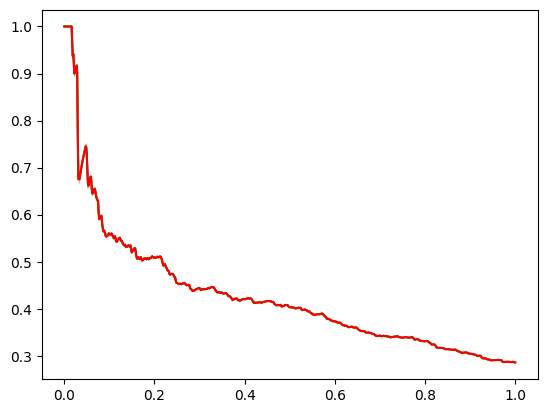

In [33]:
sns.lineplot(x=recall_default, y=precision_default, color='green')
sns.lineplot(x=recall_best, y=precision_best, color='red')

In [34]:
fpr_default, tpr_default, thresholds_default = roc_curve(y_test, proba_predictions_default)
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, proba_predictions_best)

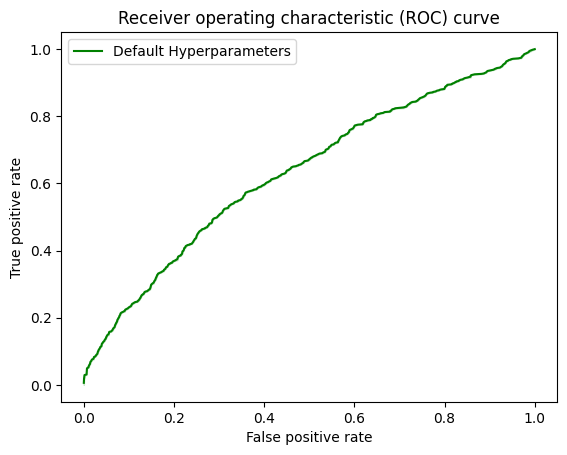

In [35]:
sns.lineplot(x=fpr_default, y=tpr_default, label='Default Hyperparameters', color='green')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend()
plt.show()

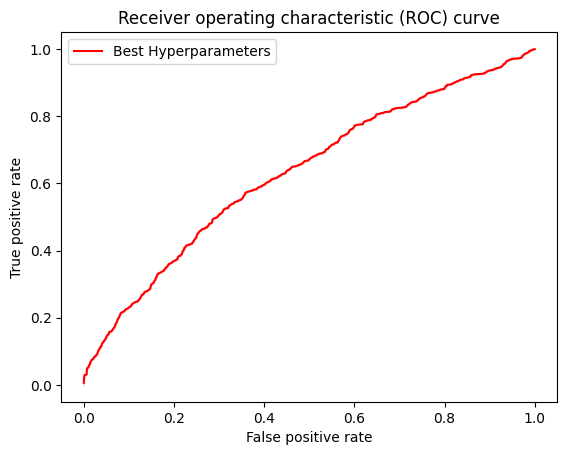

In [36]:
sns.lineplot(x=fpr_best, y=tpr_best, label='Best Hyperparameters', color='red')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend()
plt.show()

In [37]:
auc_default = auc(fpr_default, tpr_default)
auc_best =auc(fpr_best, tpr_best)

print(auc_default)
print(auc_best)

0.6318581543300644
0.6318581543300644
